In [1]:
from lib2to3.pgen2.pgen import DFAState
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow

# Load the dataset

In [6]:
df = pd.read_excel("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\maliciousornot.xlsx")
print(df)

     Type  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
0       1   23.303047                  13.445560                 159.066933   
1       1   26.645007                  23.018073                 172.149800   
2       1   25.505113                  27.525833                 168.393333   
3       1   14.792707                  26.398893                 100.491960   
4       1   26.282313                  18.575080                 174.999533   
..    ...         ...                        ...                        ...   
543     1   27.927387                  29.002513                 183.937333   
544     1   26.075060                  36.593167                 169.947733   
545     1   21.502533                  36.372960                 140.284600   
546     1   26.683867                  37.992127                 181.476200   
547     0   10.051787                  31.787480                  62.072373   

     DIST_REMOTE_TCP_PORT  REMOTE_IPS   APP_BYTES  

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [8]:
print(df.describe())

             Type    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
count  548.000000    548.000000                 548.000000   
mean     0.383212    949.973475                  25.015747   
std      0.486613   3202.802599                   5.605685   
min      0.000000     10.051787                  12.577687   
25%      0.000000     15.838688                  20.987638   
50%      0.000000     18.069900                  24.423510   
75%      1.000000     23.264187                  28.270650   
max      1.000000  12828.981333                  50.880693   

       TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
count                 548.000000            548.000000  548.000000   
mean                  119.725438            857.123249    5.785481   
std                    31.842845            461.579998   27.796268   
min                    56.722647            185.880333    0.068173   
25%                    97.470595            544.622900    0.112309   
50%                  

In [9]:
print(df.corr()["Type"].sort_values())

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

# Show the distribution of the dataset

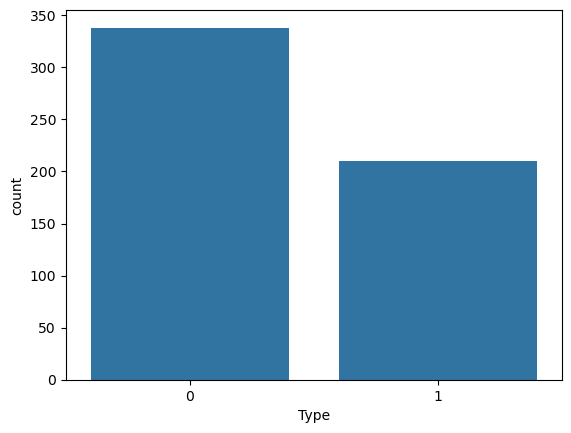

In [10]:
sbn.countplot(x="Type", data=df)
plt.show()

# Visualize the correlation matrix

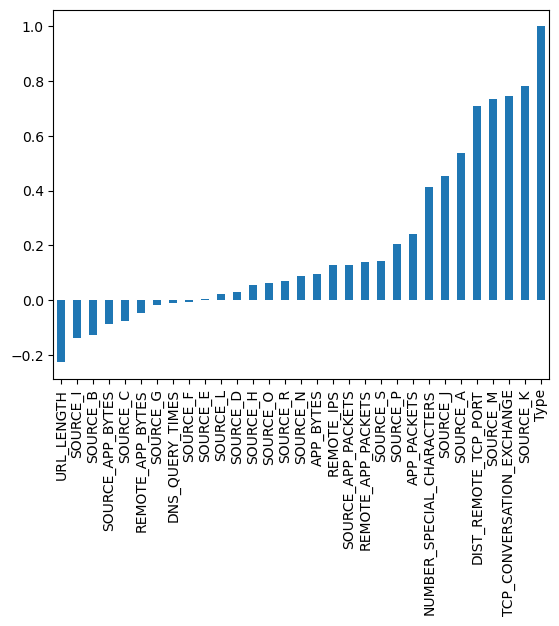

In [11]:
df.corr()["Type"].sort_values().plot(kind="bar")
plt.show()

# Prepare the data

In [12]:
y = df["Type"].values
x = df.drop("Type", axis=1).values

# Split the data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

# Scale the data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
MinMaxScaler(copy=True, feature_range=(0, 1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Model 1: Without Early Stopping

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
x_train.shape
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(x=x_train, y=y_train, epochs=700, validation_data=(x_test, y_test), verbose=1)

Epoch 1/700
12/12 [==============================] - 2s 39ms/step - loss: 2.0339 - val_loss: 1.5172
Epoch 2/700
12/12 [==============================] - 0s 9ms/step - loss: 1.0510 - val_loss: 0.9727
Epoch 3/700
12/12 [==============================] - 0s 8ms/step - loss: 0.7144 - val_loss: 0.7500
Epoch 4/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6147 - val_loss: 0.6631
Epoch 5/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5572 - val_loss: 0.6047
Epoch 6/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5170 - val_loss: 0.5623
Epoch 7/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4810 - val_loss: 0.5275
Epoch 8/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4468 - val_loss: 0.4997
Epoch 9/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4129 - val_loss: 0.4670
Epoch 10/700
12/12 [==============================] - 0s 8ms/step - loss: 0.3821 - val_loss: 0.4231
Epoch 11

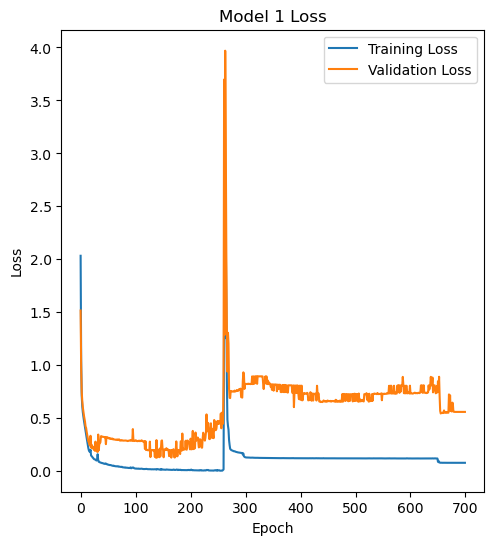

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model 1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Model 2: With Early Stopping

In [19]:
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam")
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)
model.fit(x=x_train, y=y_train, epochs=700, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/700
12/12 [==============================] - 1s 22ms/step - loss: 1.9254 - val_loss: 1.5416
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 1.1516 - val_loss: 1.1945
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.9196 - val_loss: 0.9892
Epoch 4/700
12/12 [==============================] - 0s 10ms/step - loss: 0.7883 - val_loss: 0.8786
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.7120 - val_loss: 0.8131
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6709 - val_loss: 0.7662
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6398 - val_loss: 0.7272
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6121 - val_loss: 0.6946
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5882 - val_loss: 0.6623
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5628 - val_loss: 0.6340
Epoch 1

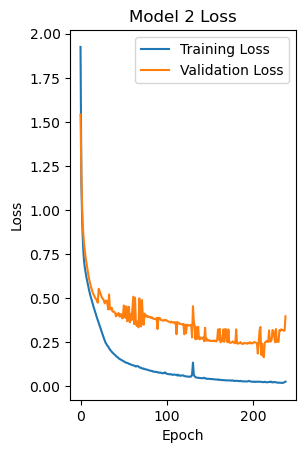

In [20]:
plt.subplot(1, 2, 2)  
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model 2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Model 3: With Dropout

In [23]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(x=x_train, y=y_train, epochs=700, validation_data=(x_test, y_test), verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 22ms/step - loss: 0.7479 - val_loss: 0.7071
Epoch 2/700
12/12 [==============================] - 0s 8ms/step - loss: 0.7151 - val_loss: 0.7030
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.7220 - val_loss: 0.7000
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6976 - val_loss: 0.6975
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.7176 - val_loss: 0.6949
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6927 - val_loss: 0.6933
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6950 - val_loss: 0.6913
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6806 - val_loss: 0.6898
Epoch 9/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6873 - val_loss: 0.6886
Epoch 10/700
12/12 [==============================] - 0s 13ms/step - loss: 0.6629 - val_loss: 0.6873
Epoch 1

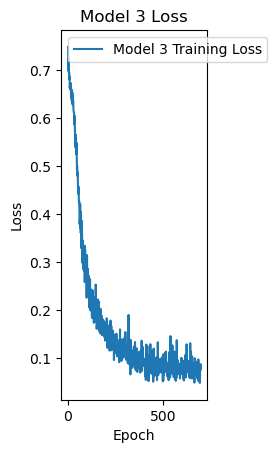

In [24]:
plt.subplot(1, 3, 3)  
plt.plot(model.history.history['loss'], label='Model 3 Training Loss')
plt.title('Model 3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()